In [2]:
class Perceptron:
    def __init__(self, N):
        self.w = list()
        for i in range(N):
            self.w.append( 0)
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
    def learn(self, la, x, y):
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    def learning(self, la, T):
        for n in range(100):
            for t in T:
                self.learn(la, t[ 0], t[1])
perceptron = Perceptron(2)
la = 0.1

T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)
print(perceptron.w)

print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


In [3]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


In [4]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные нейросети:
    -два входа
    -два нейрона в скрытых слоях (h1,h2)
    -выход (о1)
    Нейроны имеют идентичные веса и пороги:
    - w = [0,1]
    - b = 0
    '''
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)

In [6]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

In [7]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [8]:
#Task 7.1
import numpy as np
class OurNeuralNetwork:
    """
    данные нейросети:
        − три входа (𝑥1,𝑥2,𝑥3);
        − три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
        − выход (𝑜1).
    нейроны имеют идентичные веса и пороги:
        − 𝑤 = [0.5,0.5,0.5]
        − 𝑏 = 0     
    """
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # входы для о1 - это выходы h1 и h2 и h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feedforward(x))

0.8151036049051821


In [9]:
import numpy as np
class OurNeuralNetwork:
    """
    данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1, o2)
    нейроны имеют идентичные веса и пороги:
        - w = [1,0]
        - b = 1
    """
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))
        out_o = self.o.feedforward(np.array([out_o2, out_o1]))
        return out_o

network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.8671195555587996


In [3]:
#Task 7.2
from cmath import tanh


class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)

    def tanh_derivative(self, x):
        return 1 - tanh(x) * tanh(x)
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.tanh_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.tanh_derivative(self.output), self.weights2.T) * self.tanh_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2 

In [11]:
from cmath import tanh


class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)

    def ReLU_derivative(self, x):
        if x >= 0:
            return 1
        else:
            return 0
    def feedforward(self):
        self.layer1 = max(0, np.dot(self.input, self.weights1))
        self.output = max(0, np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.ReLU_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.ReLU_derivative(self.output), self.weights2.T) * self.ReLU_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2   

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [13]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


In [14]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_boston, Y_boston = data, target
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 13) (506,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size = 0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [16]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train,Y_train)

MLPClassifier(random_state=123)

In [17]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))
             

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


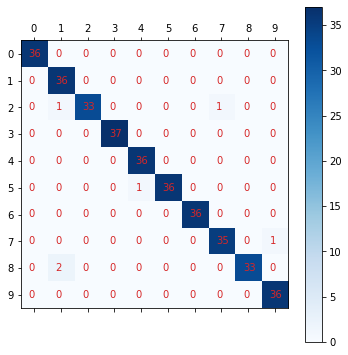

In [18]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j,i]), color='tab:red')
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))   
plt.show()

In [19]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))
print("Number of Interations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

Loss :  0.0034728684994180603
Number of Coefs :  2
Number of Intercepts :  2
Number of Interations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [21]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [22]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, Y_test))

print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score : 0.462
Training R^2 Score : 0.510


In [23]:
print("Loss : ", mlp_regressor.loss_)

Loss :  28.538174061119584


In [24]:
print("Number of Coefs : ", len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [25]:
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran :  130


In [26]:
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

Name of Output Layer Activation Function :  identity


In [27]:
url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1],    # все колонки кроме последней - в признаки
    data.iloc[:,-1], # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123, max_iter =670)
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=670, random_state=123)

In [28]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(y_test[:15])
## ммтедо Score для оценки точности моделей классификации
print('Test Accurancy: %.3f'%mlp_classifier.score(X_test, y_test))
print('Training Accurancy: %.3f'%mlp_classifier.score(X_train, y_train))

['Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor' 'Virginica'
 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
 'Setosa' 'Versicolor' 'Setosa']
11         Setosa
42         Setosa
85     Versicolor
146     Virginica
74     Versicolor
122     Virginica
56     Versicolor
67     Versicolor
53     Versicolor
113     Virginica
128     Virginica
12         Setosa
39         Setosa
50     Versicolor
32         Setosa
Name: variety, dtype: object
Test Accurancy: 1.000
Training Accurancy: 0.967


In [29]:
print("Loss: ", mlp_classifier.loss_)
print("Number of coefs: ", len(mlp_classifier.coefs_))
print("Number of intercepts: ", len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_classifier.n_iter_)
print("Name of output layer activation function: ", mlp_classifier.out_activation_)

Loss:  0.08604574939150034
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  657
Name of output layer activation function:  softmax


In [30]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1].values,    # все колонки кроме последней - в признаки
    data.iloc[:,-1].values, # последнюю в целевую переменную (класс)
    test_size = 0.20, # размер тестовой выборки 20%
    random_state=123
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(random_state=123, max_iter =100000)
mlp_regressor.fit(X_train, y_train)

(24, 1) (6, 1) (24,) (6,)


MLPRegressor(max_iter=100000, random_state=123)

In [31]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(y_test[:10])
print('Test R^2: %.3f'%mlp_regressor.score(X_test, y_test))
print('Training R^2: %.3f'%mlp_regressor.score(X_train, y_train))

[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R^2: 0.971
Training R^2: 0.948


In [32]:
print("Loss: ", mlp_regressor.loss_)
print("Number of coefs: ", len(mlp_regressor.coefs_))
print("Number of intercepts: ", len(mlp_regressor.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_regressor.n_iter_)
print("Name of output layer activation function: ", mlp_regressor.out_activation_)

Loss:  16873681.689960096
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  30344
Name of output layer activation function:  identity
